In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("train.csv")

checking columns for possible outliers

In [2]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Possible Outliers inFare let's check

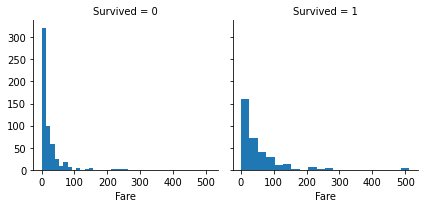

In [4]:
graph = sns.FacetGrid(df, col = "Survived")
graph.map(plt.hist , "Fare",bins=20)

now will replace the outliers with median

In [7]:
df.loc[df["Fare"] > 300 , "Fare" ] = df["Fare"].median()


Now checking for NA vaules in the df 

In [8]:
for column in df:
    print(column ,": ",df[column].isnull().sum())

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  177
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Cabin :  687
Embarked :  2



filling na values with medians

In [9]:
df["Age"].fillna(df["Age"].median() , inplace = True)


values in Embarked are not numerical so will check the most occuring value

In [11]:
print(df["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [12]:
df["Embarked"].fillna("S",inplace= True)

and now gonna del the Cabin Column beacuse there are too many Na values


In [15]:
del df["Cabin"]

In [16]:
for column in df:
    print(column ,": ",df[column].isnull().sum())
    

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  0
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Embarked :  0


Filled all the Na values possible